# Kütüphane İmportları

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

# Veri Setini Anlamak

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print("eğitim setinin boyutu : ", x_train.shape, y_train.shape)
print("test setinin boyutu : " , x_test.shape, y_train.shape)

eğitim setinin boyutu :  (60000, 28, 28) (60000,)
test setinin boyutu :  (10000, 28, 28) (60000,)


In [6]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


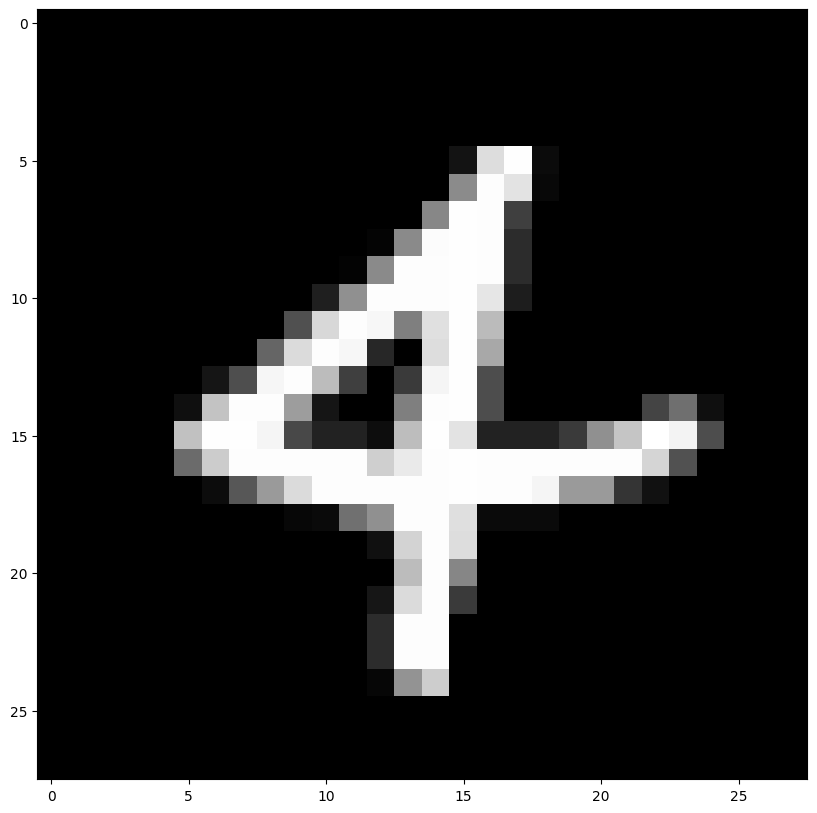

In [7]:
#veri setinden örnek getirilmesi
plt.figure(figsize=(10, 10))
plt.imshow(x_train[150], cmap="gray");

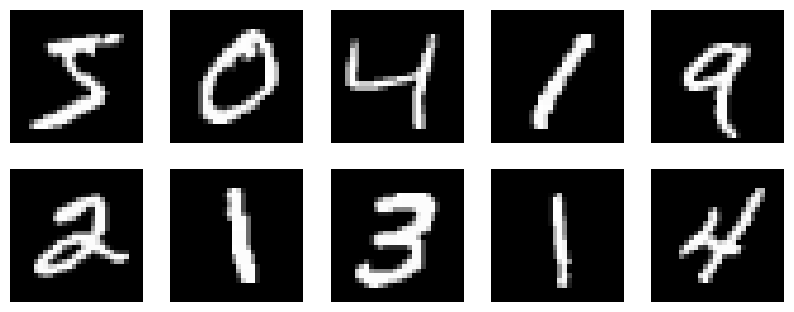

In [10]:
#train veri seti içerisinden 10 tane örnek getirilmesi
plt.figure(figsize=(10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap="gray")
  plt.axis("off")

In [13]:
#Görsellerde yer alan belirli piksellerin rgb değerine erişmek
x_train[150][15,7]

254

In [14]:
x_train[150][10, 3]

0

In [15]:
x_train[150].mean()

33.704081632653065

# Veriyi Hazırlama




## Encoding İşlemi

In [16]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Reshaping İşlemi

In [22]:
image_size = x_train.shape[1]
image_size

28

In [23]:
print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28)
x_test boyutu : (10000, 28, 28)


In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28, 1)
x_test boyutu : (10000, 28, 28, 1)


# Standardization İşlemi

In [25]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Modelleme

## Sinir Ağır Mimarisini Tanımlama

In [26]:
#Dış özellikler
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation="relu", name="layer1"),
    Dense(units=num_labels, activation="softmax", name="output_layer")])
#İç Özellikler
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3575 - precision: 0.9468 - recall: 0.8498 - accuracy: 0.9023 - val_loss: 0.1951 - val_precision: 0.9592 - val_recall: 0.9322 - val_accuracy: 0.9445
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1660 - precision: 0.9643 - recall: 0.9413 - accuracy: 0.9527 - val_loss: 0.1347 - val_precision: 0.9685 - val_recall: 0.9527 - val_accuracy: 0.9608
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1183 - precision: 0.9735 - recall: 0.9584 - accuracy: 0.9658 - val_loss: 0.1111 - val_precision: 0.9733 - val_recall: 0.9613 - val_accuracy: 0.9670
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0910 - precision: 0.9792 - recall: 0.9689 - accuracy: 0.9743 - val_loss: 0.1008 - val_precision: 0.9744 - val_recall: 0.9636 - val_accuracy: 0.9691
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0739 - precision: 0.9827 - r

# Model Başarısını Değerlendirme

In [30]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0257 - precision: 0.9943 - recall: 0.9922 - accuracy: 0.9932 - val_loss: 0.0742 - val_precision: 0.9799 - val_recall: 0.9749 - val_accuracy: 0.9766
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0223 - precision: 0.9950 - recall: 0.9934 - accuracy: 0.9941 - val_loss: 0.0727 - val_precision: 0.9806 - val_recall: 0.9771 - val_accuracy: 0.9790
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0180 - precision: 0.9961 - recall: 0.9948 - accuracy: 0.9955 - val_loss: 0.0733 - val_precision: 0.9807 - val_recall: 0.9777 - val_accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0149 - precision: 0.9970 - recall: 0.9959 - accuracy: 0.9964 - val_loss: 0.0758 - val_precision: 0.9804 - val_recall: 0.9773 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0130 - precision: 0.9974 - r

In [31]:
loss, precision, recall, acc=model.evaluate(x_test, y_test, verbose=True)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - precision: 0.9805 - recall: 0.9785 - accuracy: 0.9793

Test Accuracy: 97.9%

Test Loss: 8.5%

Test Precision: 98.0%

Test Recall: 97.9%


# Modelin Kaydedilmesi ve Tahmin İşlemi

In [32]:
model.save("mnist_model.h5")

In [34]:
import random
random = random.randint(0, x_test.shape[0])

In [35]:
random

5690

In [36]:
test_image = x_test[random]

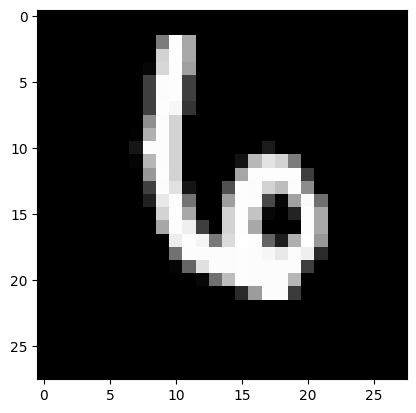

In [37]:
plt.imshow(x_test[random], cmap="gray")

In [38]:
test_data = x_test[random].reshape(1,28,28,1)

In [39]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 173ms/step


In [40]:
probability

array([[8.2851824e-13, 5.7146978e-16, 3.0931373e-09, 2.9946304e-15,
        1.1295784e-09, 4.7427863e-16, 1.0000000e+00, 2.1916132e-14,
        1.4412709e-13, 1.0326249e-16]], dtype=float32)

In [41]:
predict_classes = np.argmax(probability)

In [42]:
predict_classes

6

In [43]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Bu array değeri 6 sayısına denk gelmektedir. Yani model tahmini başarılıdır.